## 分析问题:

* 在整个泰坦尼克号的事件中，哪些人更容易幸存下来？

In [1]:
# -*- coding:utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

### 整理数据

In [2]:
titanic_df = pd.read_csv('titanic-data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


上表可以看一下，本次的数据集中包含的一些乘船者特征包括：社会阶级、姓名、性别、年龄等其他特征，如下：

- **Survived**：是否存活（0代表否，1代表是）
- **Pclass**：社会阶级（1代表上层阶级，2代表中层阶级，3代表底层阶级）
- **Name**：船上乘客的名字
- **Sex**：船上乘客的性别
- **Age**:船上乘客的年龄
- **SibSp**：乘客在船上的兄弟姐妹和配偶的数量
- **Parch**：乘客在船上的父母以及小孩的数量
- **Ticket**：乘客船票的编号
- **Fare**：乘客为船票支付的费用
- **Cabin**：乘客所在船舱的编号
- **Embarked**：乘客上船的港口（C 代表从 Cherbourg 登船，Q 代表从 Queenstown 登船，S 代表从 Southampton 登船）

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


从上边的信息可以看出，本次数据集中一共891条记录，其中Age、Cabin和Embarked特征均有缺失的情况，Cabin因缺失情况严重，故不做分析的考虑。

### 分析数据
大致看了一下数据，先从Pclass 、Age 以及 Sex入手，主要的猜测如下：

1. 女性的生还率较男性高，主要“绅士风度”作祟；
2. 年龄小的以及年龄偏大的生还率较其他年龄段高，主要考虑到“尊老爱幼”的价值观；
3. 社会阶层高（Pclass为1）的生还率较其他阶层高，主要考虑到当时的阶级观念。

* **生存率跟年龄之间的关系分析**

177

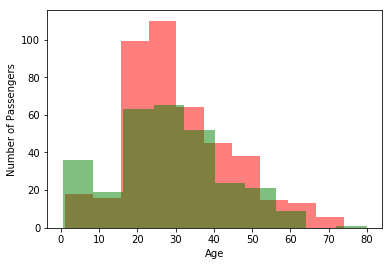

In [6]:
# 年龄跟生存率相关的
age_data = titanic_df[['Age', 'Survived']]

# 但是因为年龄里边有Nan，所以要先除掉
only_age = titanic_df['Age']
display(only_age.isnull().sum())

age_data = age_data.dropna()

# 年龄跟幸存人数的可视化
%matplotlib inline
not_survived = age_data[age_data['Survived'] == 0]['Age']
survived = age_data[age_data['Survived'] == 1]['Age']

plt.figure()
plt.hist(not_survived, color='red', alpha=0.5, label=u'死亡')
plt.hist(survived, color='green', alpha=0.5, label=u'幸存')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

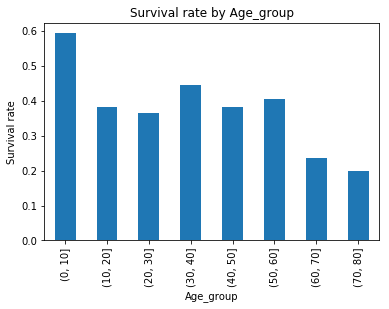

In [7]:
def survival_rate(key):
 titanic_df.groupby(key)['Survived'].mean().plot(kind='bar')
 plt.ylabel('Survival rate')
 plt.title('Survival rate by {}'.format(key))

# 分组
bins=np.arange(0,90,10)
titanic_df['Age_group'] = pd.cut(titanic_df['Age'], bins)
survival_rate('Age_group')

**小结：**

只考虑年龄因素的话，年龄小于十岁的生存率高。这里有与猜想不一致的地方，就是70~80年龄组的人生存率是最低的，基本上是随着年龄越大，生存率越低的趋势，并没有像最开始猜想一样因为“尊老爱幼”使得老年人生存率高一点。

* **生存率跟性别之间的关系分析**

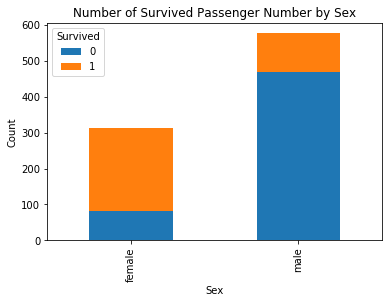

In [8]:
# 构建绘制人数的堆柱形图
def survival_count(key):
 titanic_df.groupby([key,'Survived'])['Survived'].count().unstack().plot(kind='bar',stacked=True)
 plt.ylabel('Count')
 plt.title('Number of Survived Passenger Number by {}'.format(key))
# 调用 
survival_count('Sex')

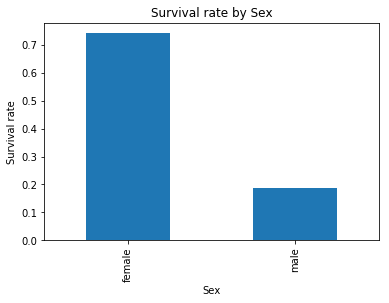

In [9]:
survival_rate('Sex')

**小结：**

与猜想结果一致，女性的生存率比男性高。

* **生存率跟社会阶级之间的关系分析**

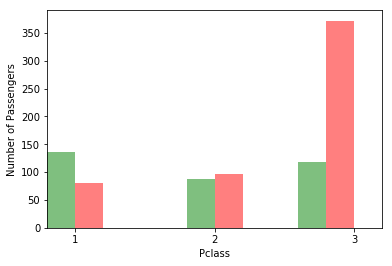

In [10]:
# Pclass跟幸存人数的可视化
%matplotlib inline
pclass_data = titanic_df[['Pclass', 'Survived']].dropna()

not_survived = pclass_data[pclass_data['Survived'] == 0]['Pclass']
survived = pclass_data[pclass_data['Survived'] == 1]['Pclass']

plt.figure()
plt.hist(not_survived, color='red', alpha=0.5, label=u'死亡', align='right')
plt.hist(survived, color='green', alpha=0.5, label=u'幸存', align='left')
plt.xlim(0.9, 3.3)
plt.xticks([1.1, 2.1, 3.1], [1, 2, 3])
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')
plt.show()

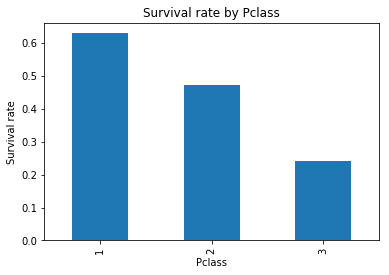

In [11]:
survival_rate('Pclass')

**小结：**

基本于猜想一直，越底层阶级的死亡率高。

* **生存率在性别、阶级、年龄中两两的互相关系**

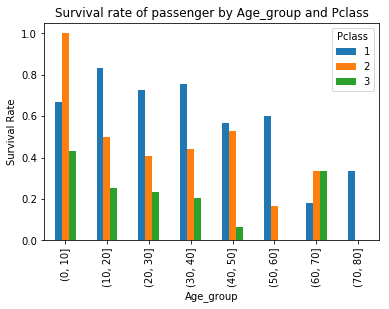

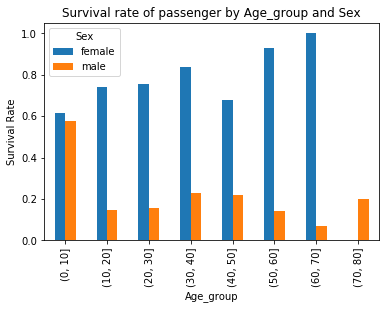

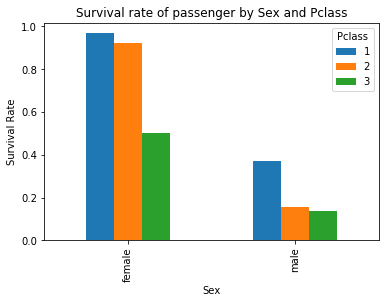

In [12]:
# 绘制两个控制因素的生存率图

def survival_rate_of(key_1, key_2):
    titanic_df.groupby([key_1, key_2]).mean()['Survived'].unstack().plot(kind='bar')
    plt.ylabel('Survival Rate')
    plt.title('Survival rate of passenger by {} and {}'.format(key_1, key_2))

survival_rate_of('Age_group', 'Pclass')
survival_rate_of('Age_group', 'Sex')
survival_rate_of('Sex', 'Pclass')

**小结：**

1. 以上三图信息量比较多，挑几个比较明显的特征进行说明；
2. 之前所说的阶级越高生存率越高，但是在图一中的60~70的年龄组会发现，Pclass=1的生存率反而比2、3的更低，猜测可能是因为样本数量偏少的原因，下边的计算也验证了我的想法；
3. 除此之外，在图二中年龄段在0~10的范围内基本上无论男女生存率相当，以及在图三中，女性中上层阶级与中层阶级相当，男性中中层姐姐与下层阶级相当。

In [43]:
num = titanic_df[titanic_df['Pclass']==1][titanic_df[titanic_df['Pclass']==1]['Age'].isin(range(61, 71))].count().values[0]
print('Pclass为1的并且年龄介于60~70的人有{}个，占总体的{}'.format(num, round(num/891., 2)))

Pclass为1的并且年龄介于60~70的人有11个，占总体的0.01


**分析限制性：**

1. 以上的分析及结论围绕着题目给定的891条数据样本进行分析，并不是全体乘客（了解了一下，乘客约2200多名，样本数量是足够的），同时由于本报告中没有进行统计检验来计算样本的可信度，所以分析的结果可能会因为样本取样的偏差而不能够真实的反映情况；
2. 本次数据集囊括了乘船者社会阶级、姓名、性别、年龄等其他特征，但是还有可能有其特征影响着他们的生还几率，例如：是否会游泳、上船时候的身体状况有无生病、人种、体重等。
